In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()

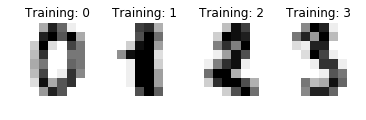

In [60]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [61]:
digits.images.shape

(1797, 8, 8)

In [62]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [63]:
data.shape

(1797, 64)

In [64]:
dataDF=pd.DataFrame(data)
dataDF['digit_label']=digits.target
dataDF.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,digit_label
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [65]:
dataDF49=dataDF[dataDF.digit_label.isin([4, 9] )]
dataDF49.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,digit_label
count,361.0,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.0,361.000000,...,361.000000,361.0,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.0,0.072022,3.060942,9.437673,11.376731,3.972299,0.889197,0.124654,0.0,1.243767,...,0.055402,0.0,0.055402,3.132964,9.922438,12.476454,5.415512,1.044321,0.027701,6.493075
std,0.0,0.333864,3.995365,5.152898,3.875408,4.736889,2.899985,1.168321,0.0,2.340791,...,0.390484,0.0,0.283294,4.054359,5.361340,4.220338,5.555196,2.768519,0.221880,2.503460
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.0,0.000000,0.000000,5.000000,9.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,5.000000,11.000000,0.000000,0.000000,0.000000,4.000000
50%,0.0,0.000000,1.000000,11.000000,13.000000,2.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,12.000000,14.000000,4.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,6.000000,14.000000,15.000000,7.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,0.0,0.000000,6.000000,14.000000,16.000000,10.000000,0.000000,0.000000,9.000000
max,0.0,4.000000,15.000000,16.000000,16.000000,16.000000,16.000000,15.000000,0.0,12.000000,...,5.000000,0.0,3.000000,15.000000,16.000000,16.000000,16.000000,16.000000,3.000000,9.000000


In [67]:
y=dataDF49['digit_label']
X=dataDF49.drop(columns=['digit_label'])

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression
logfit=LogisticRegression().fit(X_train, y_train)

In [75]:
logfit.intercept_, logfit.coef_

(array([-0.00151166]),
 array([[ 0.00000000e+00,  1.92155630e-04,  4.23608909e-02,
          1.22769347e-01,  1.23714307e-01,  3.59812771e-01,
          1.53897464e-01,  2.92509583e-04,  0.00000000e+00,
          8.66770859e-02,  1.27714267e-01,  5.95976195e-02,
          2.15881061e-01,  1.90602052e-01,  4.89190544e-02,
         -6.84210855e-02,  0.00000000e+00,  5.84413223e-02,
          2.15581702e-02, -7.89021254e-02, -8.31549440e-02,
          7.22810343e-02, -1.55833129e-02, -6.40129244e-02,
         -2.62297980e-04, -7.78718491e-02, -8.59377159e-02,
          1.46445892e-02,  2.33059484e-02,  4.46702848e-02,
         -1.16036941e-01, -8.18709145e-03,  0.00000000e+00,
         -1.74616966e-01, -1.83398136e-01, -1.02357182e-01,
         -1.50325045e-01,  7.59559848e-03, -1.09437957e-01,
          0.00000000e+00,  2.96554278e-05, -5.62860743e-02,
         -6.09775329e-02, -2.72643775e-01, -2.16503520e-01,
          1.84865596e-02,  5.78357414e-02, -2.10572377e-05,
          7.23349

In [76]:
y_pred=logfit.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [82]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[95  0]
 [ 0 86]]
